In [1]:
pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [2]:
import mxnet as mx
import matplotlib.pyplot as plt
from mxnet import gluon, nd
from mxnet.gluon.model_zoo import vision
import numpy as np
import json


In [3]:
ctx = mx.cpu()

In [4]:
densenet121 = vision.densenet201(pretrained = True, ctx = ctx)
mobileNet = vision.mobilenet0_75(pretrained = True, ctx = ctx)
resnet18 = vision.resnet152_v1(pretrained = True, ctx = ctx)


In [5]:
mobileNet

MobileNet(
  (features): HybridSequential(
    (0): Conv2D(3 -> 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=24)
    (2): Activation(relu)
    (3): Conv2D(1 -> 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=24, bias=False)
    (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=24)
    (5): Activation(relu)
    (6): Conv2D(24 -> 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=48)
    (8): Activation(relu)
    (9): Conv2D(1 -> 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=48, bias=False)
    (10): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=48)
    (11): Activation(relu)
    (12): Conv2D(48 -> 96, kernel_size=(1, 1), stride=(1

In [6]:
mobileNet.features[0].params
print(mobileNet.output)

Dense(768 -> 1000, linear)


In [8]:
mx.test_utils.download('https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/onnx/image_net_labels.json')

categories = np.array(json.load(open('image_net_labels.json','r')))


In [9]:
for i in range(100):
  val=categories[i]
  print(val)


tench, Tinca tinca
goldfish, Carassius auratus
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
tiger shark, Galeocerdo cuvieri
hammerhead, hammerhead shark
electric ray, crampfish, numbfish, torpedo
dtingray
cock
hen
ostrich, Struthio camelus
brambling, Fringilla montifringilla
goldfinch, Carduelis carduelis
house finch, linnet, Carpodacus mexicanus
junco, snowbird
indigo bunting, indigo finch, indigo bird, Passerina cyanea
robin, American robin, Turdus migratorius
bulbul
jay
magpie
chickadee
water ouzel, dipper
kite
bald eagle, American eagle, Haliaeetus leucocephalus
vulture
great grey owl, great gray owl, Strix nebulosa
European fire salamander, Salamandra salamandra
common newt, Triturus vulgaris
eft
spotted salamander, Ambystoma maculatum
axolotl, mud puppy, Ambystoma mexicanum
bullfrog, Rana catesbeiana
tree frog, tree-frog
tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui
loggerhead, loggerhead turtle, Caretta caretta
leatherback

In [52]:
# import cv2
# img = cv2.imread(img_file)
# plt.imshow(img)
# plt.show()

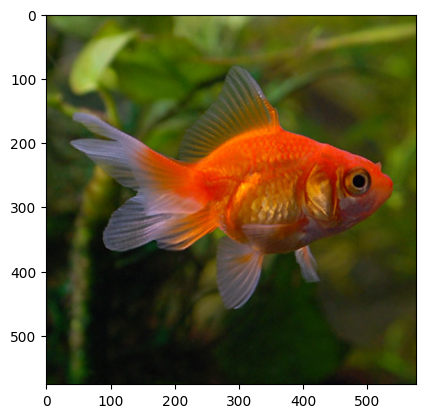

In [13]:
img_file = "/content/Gold_fish.jpg"
image = mx.image.imread(img_file)
plt.imshow(image.asnumpy())

In [20]:
from mxnet.test_utils import new_orthonormal_matrix_2d
def transform(image_):
  resize = mx.image.resize_short(image_,224)
  cropped, crop_info = mx.image.center_crop(resize,(224,224))
  normalized = mx.image.color_normalize(cropped.astype(np.float32)/255,mean = mx.nd.array([0.485,0.456,0.406]),std=mx.nd.array([0.229,0.224,0.225]))

  transposed = normalized.transpose((2,0,1))
  batchified = transposed.expand_dims(0)
  return batchified

In [21]:
prediction = densenet121(transform(image)).softmax()
print(prediction.shape)

(1, 1000)


In [22]:
def predict(model, image, categories, k):
    predictions = model(transform(image)).softmax()
    top_pred = predictions.topk(k=k)[0].asnumpy()
    for index in top_pred:
        probability = predictions[0][int(index)]
        category = categories[int(index)]
        print("{}: {:.2f}%".format(category, probability.asscalar()*100))
    print('')

In [29]:
predict(mobileNet, image, categories, 3)
# predict(densenet121, image, categories, 3)
# predict(resnet18, image, categories, 3)


goldfish, Carassius auratus: 100.00%
hummingbird: 0.00%
macaw: 0.00%

